In [1]:
### Figure 3a,b for the PERISCOPE manuscript. ###
### Script by Meraj Ramezani(mramezan@broadinstitute.org) ###
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  

In [3]:
# Import the Hela HPLM guide level profiles and extract the features. 
df = pd.read_csv("../20210422_6W_CP257_guide_normalized_feature_select_median_merged_ALLBATCHES___HPLM___ALLWELLS.csv.gz")
guide_df = pd.read_csv('../wgs_guide_list.csv')
cp257_guide_df = guide_df.query('dialout == 1 | dialout ==3')
cp257_guide_list = list(cp257_guide_df['sgRNA'])
df = df[df["Metadata_Foci_Barcode_MatchedTo_Barcode"].isin(cp257_guide_list)]
features = list(df.columns)[2:]
mito_list = [feature for feature in df.columns if 'mito'  in feature.lower()]
cona_list = [feature for feature in df.columns if 'cona'  in feature.lower()]
dapi_list = [feature for feature in df.columns if 'dapi'  in feature.lower()]
wga_list = [feature for feature in df.columns if 'wga'  in feature.lower()]
phalloidin_list = [feature for feature in df.columns if 'phalloidin'  in feature.lower()]
print('Number of features per compartment: ','\n',
      'Mito features: ',len(mito_list),'\n',
      'ConA features: ',len(cona_list),'\n',
      'DAPI features: ',len(dapi_list),'\n',
      'WGA features: ',len(wga_list),'\n',
      'Phalloidin features: ',len(phalloidin_list))

Number of features per compartment:  
 Mito features:  399 
 ConA features:  250 
 DAPI features:  370 
 WGA features:  337 
 Phalloidin features:  261


In [4]:
# Extract the expression data from the Broad Institute Dependency Map data set
express = pd.read_csv("../CCLE_expression_hela.csv")

for i in range(len(express.index)):
    express.iloc[i,0] = express.iloc[i,0].split()[0]

express_min , express_max = express['HELA_CERVIX'].min(), express['HELA_CERVIX'].max()

express = express.sort_values(by = ['Unnamed: 0']).set_index('Unnamed: 0')

all_genes_list = list(df.Metadata_Foci_Barcode_MatchedTo_GeneCode.unique())
zero_express = express.query('HELA_CERVIX == 0')
zero_express_list = list(zero_express.index)

zero_tpm = [value for value in zero_express_list if value in all_genes_list]
zero_tpm = sorted(list(set(zero_tpm)))


expressed_gene_list = [value for value in all_genes_list if value not in zero_tpm]
expressed_gene_list.remove('nontargeting')

print(len(zero_express_list),len(all_genes_list),len(zero_tpm),len(expressed_gene_list))

33120 20393 3665 16727


In [5]:
# Load p_values for the Hela HPLM WGS from the hit calling process
df_p_values = pd.read_csv('../cp257_hplm_sig_features_mann_whitney_whole_genome_median_p_values.csv').rename(columns={'Unnamed: 0':''}).set_index('')
df_p_values = df_p_values.rename(columns=int)

# Integer names back to sring feature names for downstream analysis
features_dic_forward = {features[i] : i for i in range(len(features))}
features_dic_reverse = {i : features[i] for i in range(len(features))}
df_int_feats = df.rename(columns=features_dic_forward)
df_str_feats = df_int_feats.rename(columns=features_dic_reverse)
df_p_values_str_feats = df_p_values.rename(columns=features_dic_reverse)
df_p_values_str_feats

,Cells_AreaShape_CentralMoment_0_3,Cells_AreaShape_CentralMoment_1_0,Cells_AreaShape_CentralMoment_1_2,Cells_AreaShape_CentralMoment_1_3,Cells_AreaShape_CentralMoment_2_1,Cells_AreaShape_CentralMoment_2_3,Cells_AreaShape_Compactness,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_HuMoment_1,...,Nuclei_Texture_SumVariance_Mito_10_03_256,Nuclei_Texture_SumVariance_Phalloidin_10_01_256,Nuclei_Texture_SumVariance_Phalloidin_10_02_256,Nuclei_Texture_SumVariance_Phalloidin_10_03_256,Nuclei_Texture_SumVariance_WGA_10_00_256,Nuclei_Texture_SumVariance_WGA_10_01_256,Nuclei_Texture_SumVariance_WGA_10_02_256,Nuclei_Texture_SumVariance_WGA_10_03_256,Nuclei_Texture_SumVariance_WGA_5_03_256,Nuclei_Texture_Variance_DAPI_Painting_10_03_256
,,,,,,,,,,,,,,,,,,,,,
A1BG,0.086287,0.925936,0.551426,0.213209,4.421232e-09,0.742758,0.103179,0.107254,1.039936e-01,0.989404,...,0.100794,0.000728,0.472134,0.013438,0.103984,0.319254,0.085997,0.922922,0.083260,0.089521
A1CF,0.024309,0.910878,0.635356,0.284026,6.537873e-01,0.000759,0.883859,0.074847,8.591084e-01,0.103179,...,0.007864,0.182309,0.132473,0.565407,0.535020,0.338038,1.000000,0.537521,0.431102,0.001465
A2M,0.844763,0.085306,0.109259,0.020245,1.978586e-01,0.998486,0.904864,0.088098,9.343601e-01,0.106429,...,0.255798,0.971246,0.002417,0.000944,0.113171,0.604517,0.934984,0.995459,0.407079,0.097683
A2ML1,0.867739,0.000769,0.677780,0.025791,1.375126e-01,0.013581,0.000769,0.152049,9.251428e-07,0.998486,...,0.953103,0.989404,0.083938,0.139445,0.062733,0.042946,0.950081,0.079286,0.105609,0.005512
A3GALT2,0.645863,0.123908,0.914012,0.873501,1.119651e-01,0.093902,0.000708,0.000634,1.713227e-07,0.125774,...,0.103984,0.977298,0.557733,0.086693,0.907871,1.000000,0.108084,0.096156,0.182309,0.009716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,0.566302,0.604516,0.000220,0.096451,8.418995e-01,0.965196,0.003769,0.081918,1.064657e-03,0.789088,...,0.196377,0.247947,0.000679,0.326684,0.048278,0.562843,0.111454,0.683360,0.907871,0.134437
ZYX,0.000005,0.702963,0.003290,0.995619,1.333319e-01,0.085306,0.258986,0.109759,5.940290e-01,0.095400,...,0.008795,0.093160,0.088098,0.088098,0.085306,0.031599,0.237241,0.019132,0.001251,0.702964
ZZEF1,0.174374,0.910878,0.810550,0.258982,8.133887e-01,0.081918,0.977298,0.962172,9.111091e-01,0.098454,...,0.913888,0.001781,0.000689,0.446808,0.030127,0.028714,0.001095,0.000931,0.076094,0.221085


In [6]:
# Quntification of number of significant features per compartment at a certain p-value
p_value = 0.001
gene_list = list(df_p_values_str_feats.index)

df_sig_feature = pd.DataFrame(index=gene_list)
for gene in gene_list:
    # Count mito features 
    mito_c = 0 
    for feat in mito_list:
        #print(len(mito_list))
        if df_p_values_str_feats.loc[gene,feat] < p_value:
            mito_c += 1 
    # Count cona features 
    cona_c = 0 
    for feat in cona_list:
        #print(df_p_values_mito.loc[f'{gene}'][feat])
        if df_p_values_str_feats.loc[gene,feat] < p_value:
            cona_c += 1 
    # Count wga features 
    wga_c = 0 
    for feat in wga_list:
        #print(df_p_values_mito.loc[f'{gene}'][feat])
        if df_p_values_str_feats.loc[gene,feat] < p_value:
            wga_c += 1 
    # Count dapi features 
    dapi_c = 0 
    for feat in dapi_list:
        #print(df_p_values_mito.loc[f'{gene}'][feat])
        if df_p_values_str_feats.loc[gene,feat] < p_value:
            dapi_c += 1 
    # Count wga features 
    phal_c = 0 
    for feat in phalloidin_list:
        #print(df_p_values_mito.loc[f'{gene}'][feat])
        if df_p_values_str_feats.loc[gene,feat] < p_value:
            phal_c += 1 
    # Count all features
    sum_c = 0
    for feat in features:
        #print(df_p_values_mito.loc[f'{gene}'][feat])
        if df_p_values_str_feats.loc[gene,feat] < p_value:
            sum_c += 1 
            
    df_sig_feature.loc[gene,'Mito'] = mito_c
    df_sig_feature.loc[gene,'ConA'] = cona_c
    df_sig_feature.loc[gene,'WGA'] = wga_c
    df_sig_feature.loc[gene,'DAPI'] = dapi_c
    df_sig_feature.loc[gene,'Phalloidin'] = phal_c
    df_sig_feature.loc[gene,'Sum'] = sum_c
    
df_sig_feature = df_sig_feature.drop(index = 'sig_gene_count')
df_sig_feature

,Mito,ConA,WGA,DAPI,Phalloidin,Sum
A1BG,30.0,14.0,32.0,30.0,23.0,128.0
A1CF,22.0,10.0,24.0,46.0,16.0,119.0
A2M,23.0,16.0,24.0,21.0,17.0,106.0
A2ML1,51.0,15.0,34.0,26.0,17.0,158.0
A3GALT2,34.0,26.0,31.0,33.0,22.0,151.0
...,...,...,...,...,...,...
ZYG11A,28.0,16.0,14.0,26.0,13.0,98.0
ZYG11B,77.0,33.0,36.0,46.0,33.0,225.0
ZYX,59.0,26.0,27.0,16.0,24.0,160.0
ZZEF1,22.0,18.0,29.0,23.0,16.0,116.0


In [7]:
# Perturbations divided into 2 groups of controls with 0 TPM and others
df_sig_feature_zero_tpm = df_sig_feature.loc[zero_tpm]
df_sig_feature_expressed = df_sig_feature.loc[expressed_gene_list]
df_sig_feature_zero_tpm

,Mito,ConA,WGA,DAPI,Phalloidin,Sum
A1CF,22.0,10.0,24.0,46.0,16.0,119.0
A2ML1,51.0,15.0,34.0,26.0,17.0,158.0
A3GALT2,34.0,26.0,31.0,33.0,22.0,151.0
A4GNT,130.0,29.0,51.0,45.0,27.0,276.0
AADAC,26.0,25.0,32.0,24.0,18.0,131.0
...,...,...,...,...,...,...
ZSCAN10,36.0,13.0,21.0,26.0,23.0,121.0
ZSCAN23,37.0,14.0,62.0,33.0,37.0,187.0
ZSCAN4,15.0,10.0,23.0,12.0,29.0,102.0
ZSCAN5B,32.0,21.0,15.0,46.0,17.0,137.0


In [8]:
# Function required for false discovery rate (FDR) calculation

def fdr_5(control_sig_feature):
    total = len(control_sig_feature)
    fdr_5 = int(total/20)
    mito_5, cona_5, wga_5, dapi_5, phal_5, sum_5 = 0,0,0,0,0,0
    channels = ['Mito','ConA','WGA','DAPI','Phalloidin']
    c = 200
    feat_5 = 0
    while feat_5 <= fdr_5:
        feat_5 = len(control_sig_feature.query('Mito > @c'))
        mito_5 = c + 1
        c-=1    
    
    c = 200
    feat_5 = 0
    while feat_5 <= fdr_5:
        feat_5 = len(control_sig_feature.query('ConA > @c'))
        cona_5 = c + 1
        c-=1     
        
    c = 200
    feat_5 = 0
    while feat_5 <= fdr_5:
        feat_5 = len(control_sig_feature.query('WGA > @c'))
        wga_5 = c + 1
        c-=1    
    
    c = 200
    feat_5 = 0
    while feat_5 <= fdr_5:
        feat_5 = len(control_sig_feature.query('DAPI > @c'))
        dapi_5 = c + 1
        c-=1    
    
    c = 200
    feat_5 = 0
    while feat_5 <= fdr_5:
        feat_5 = len(control_sig_feature.query('Phalloidin > @c'))
        phal_5 = c + 1
        c-=1    
        
    c = 200
    feat_5 = 0
    while feat_5 <= fdr_5:
        feat_5 = len(control_sig_feature.query('Sum > @c'))
        sum_5 = c + 1
        c-=1    
    
    return mito_5, cona_5, wga_5, dapi_5, phal_5, sum_5

In [9]:
mito_5, cona_5, wga_5, dapi_5, phal_5,sum_5 = fdr_5(df_sig_feature_zero_tpm)
print(' Mito genes', mito_5, '\n', 
      'ConA genes', cona_5, '\n', 
      'WGA genes', wga_5, '\n', 
      'DAPI genes', dapi_5, '\n', 
      'Phalloidin genes', phal_5, '\n',
      'Sum genes', sum_5)

 Mito genes 68 
 ConA genes 45 
 WGA genes 73 
 DAPI genes 54 
 Phalloidin genes 52 
 Sum genes 201


In [10]:
# Save the number of significan features per channel for whole cell hits and comapartment hits
hplm_whole_cell = df_sig_feature_expressed.query('Sum > @sum_5')
hplm_comp_spec = df_sig_feature_expressed.query('Sum <= @sum_5').query('Phalloidin > @phal_5 | DAPI > @dapi_5 | WGA > @wga_5 | ConA > @cona_5 | Mito > @mito_5')
hplm_whole_cell.to_csv('cp257_hplm_plate_level_median_per_feat_sig_genes_5_fdr_whole_cell_hits.csv',index=True)
hplm_comp_spec.to_csv('cp257_hplm_plate_level_median_per_feat_sig_genes_5_fdr_compartment_specific_hits.csv',index=True)
hplm_whole_cell

,Mito,ConA,WGA,DAPI,Phalloidin,Sum
AAAS,43.0,42.0,63.0,68.0,18.0,230.0
AAED1,50.0,29.0,29.0,60.0,36.0,211.0
AAGAB,73.0,51.0,41.0,52.0,33.0,250.0
AAR2,30.0,16.0,16.0,53.0,83.0,208.0
AATF,81.0,31.0,40.0,89.0,80.0,315.0
...,...,...,...,...,...,...
ZSWIM6,166.0,50.0,35.0,70.0,39.0,368.0
ZSWIM7,57.0,40.0,81.0,38.0,16.0,238.0
ZSWIM8,79.0,65.0,69.0,25.0,18.0,260.0
ZYG11B,77.0,33.0,36.0,46.0,33.0,225.0


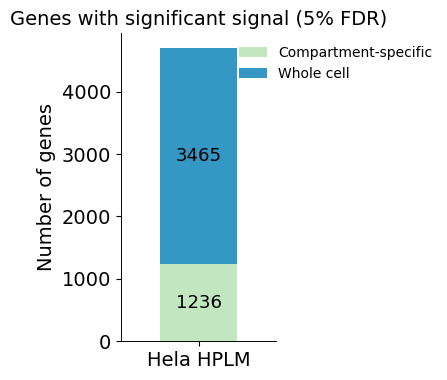

In [11]:
# Plot hits summary for Fig 3A
hplm_whole_cell = len(df_sig_feature_expressed.query('Sum > @sum_5'))
hplm_comp_spec = len(df_sig_feature_expressed.query('Sum <= @sum_5').query('Phalloidin > @phal_5 | DAPI > @dapi_5 | WGA > @wga_5 | ConA > @cona_5 | Mito > @mito_5'))


mpl.rc('axes', linewidth=0.7)
mpl.rc('xtick', labelsize=14)
mpl.rc('xtick', labelsize=14)

fig, ax = plt.subplots( figsize=(2,4))
colors = sns.color_palette('GnBu')[:8]
hits_plot = pd.DataFrame({'Compartment-specific': [hplm_comp_spec],
                         'Whole cell': [hplm_whole_cell] },
                        index=['Hela HPLM'])

hits_plot.plot(kind='bar', 
               stacked=True,
               color=[colors[1], colors[4]],#['tab:blue', 'tab:red']
               legend = 'reverse',
               rot = 0,
               fontsize= 14,
               width = 0.5,
               ax=ax)

ax.set_title('Genes with significant signal (5% FDR)',size=14) #Genes with significant signal above noise
ax.set_ylabel('Number of genes',size=14)

ax.bar_label(ax.containers[0],label_type='center',size=13)
ax.bar_label(ax.containers[1],label_type='center',size=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc="upper left", bbox_to_anchor=(0.68,1),frameon=False, ncol=1)
fig.savefig(f'Fig3_A_Hela_HPLM_whole_cell_compartment_specific_hits.png',dpi = 300,bbox_inches='tight')

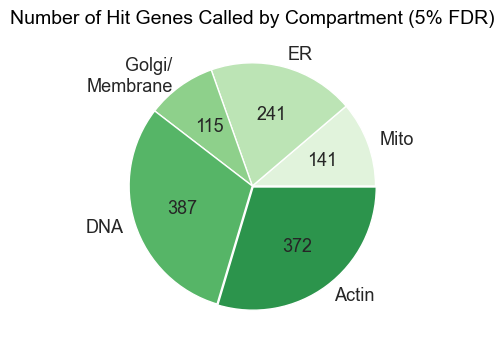

In [12]:
# Plot hits summary for Fig 3B

def absolute_value2(val):
    a  = data[np.abs(data - val/100.*sum(data)).argmin() ]
    return a

labels = ['Mito','ER','Golgi/\nMembrane','DNA','Actin']
data = [len(df_sig_feature_expressed.query('Mito > @mito_5 & Sum <= @sum_5')),
        len(df_sig_feature_expressed.query('ConA > @cona_5 & Sum <= @sum_5')),
        len(df_sig_feature_expressed.query('WGA > @wga_5 & Sum <= @sum_5')),
        len(df_sig_feature_expressed.query('DAPI > @dapi_5 & Sum <= @sum_5')),
        len(df_sig_feature_expressed.query('Phalloidin > @phal_5 & Sum <= @sum_5'))]

colors = sns.color_palette('Greens')[:5]#RdBu
               
fig, ax = plt.subplots(figsize=(7,4))

sns.set_theme(style='white',palette='RdBu')
plt.pie(data,
        labels=labels,
        autopct=absolute_value2,
        colors=colors,
        textprops={'fontsize': 13},
        explode=(0.0, 0.0, 0.0, 0.0, 0.01))
ax.set_title('Number of Hit Genes Called by Compartment (5% FDR)',size=14)
fig.savefig(f'Fig3_B_Hela_HPLM_compartment_specific_hits_distribution.png',dpi = 300,bbox_inches='tight')